In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Import data
dataset = pd.read_csv('cardio_data.csv')

In [3]:
# Rename some of the columns to make them more readable
dataset = dataset.rename(columns = {'alco' : 'alcohol', 'gluc' : 'glucose', 'smoke' : 'smoking'})

# Python build-in function to label encode categorical data, which I commented off because I prefer the alternative
#le = LabelEncoder()
#dataset['country'] = le.fit_transform(dataset['country'])

# Alternate way to label encode categorical data
dataset['country'].replace({'India': 1, 'Indonesia': 2, 'Malaysia': 3, 'Singapore': 4}, inplace = True)
dataset['occupation'].replace({'Others': 0, 'Accountant': 1, 'Architect': 2, 'Chef': 3, 'Doctor': 4, 'Engineer': 5, 'Lawyer': 6, 'Nurse': 7, 'Teacher': 8}, inplace = True)

In [4]:
# Look at data, checking for null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  int64  
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alcohol      70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  glucose      70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  int64  
 13  smoking      70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(14), object(1)
memory usage: 8.5+ MB


In [5]:
# Look for more details of the numeric data, checking for any potential issues
dataset.describe()

,country,id,active,age,alcohol,ap_hi,ap_lo,cholesterol,gender,glucose,height,occupation,smoking,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,2.505229,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,3.990143,0.088129,74.205690,0.499700
std,1.118962,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,2.585426,0.283484,14.395757,0.500003
min,1.000000,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,0.000000,10.000000,0.000000
25%,2.000000,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,2.000000,0.000000,65.000000,0.000000
50%,3.000000,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,4.000000,0.000000,72.000000,0.000000
75%,4.000000,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,6.000000,0.000000,82.000000,1.000000
max,4.000000,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,8.000000,1.000000,200.000000,1.000000


array([[<Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'ap_hi'}>],
       [<Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'occupation'}>],
       [<Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'disease'}>]], dtype=object)

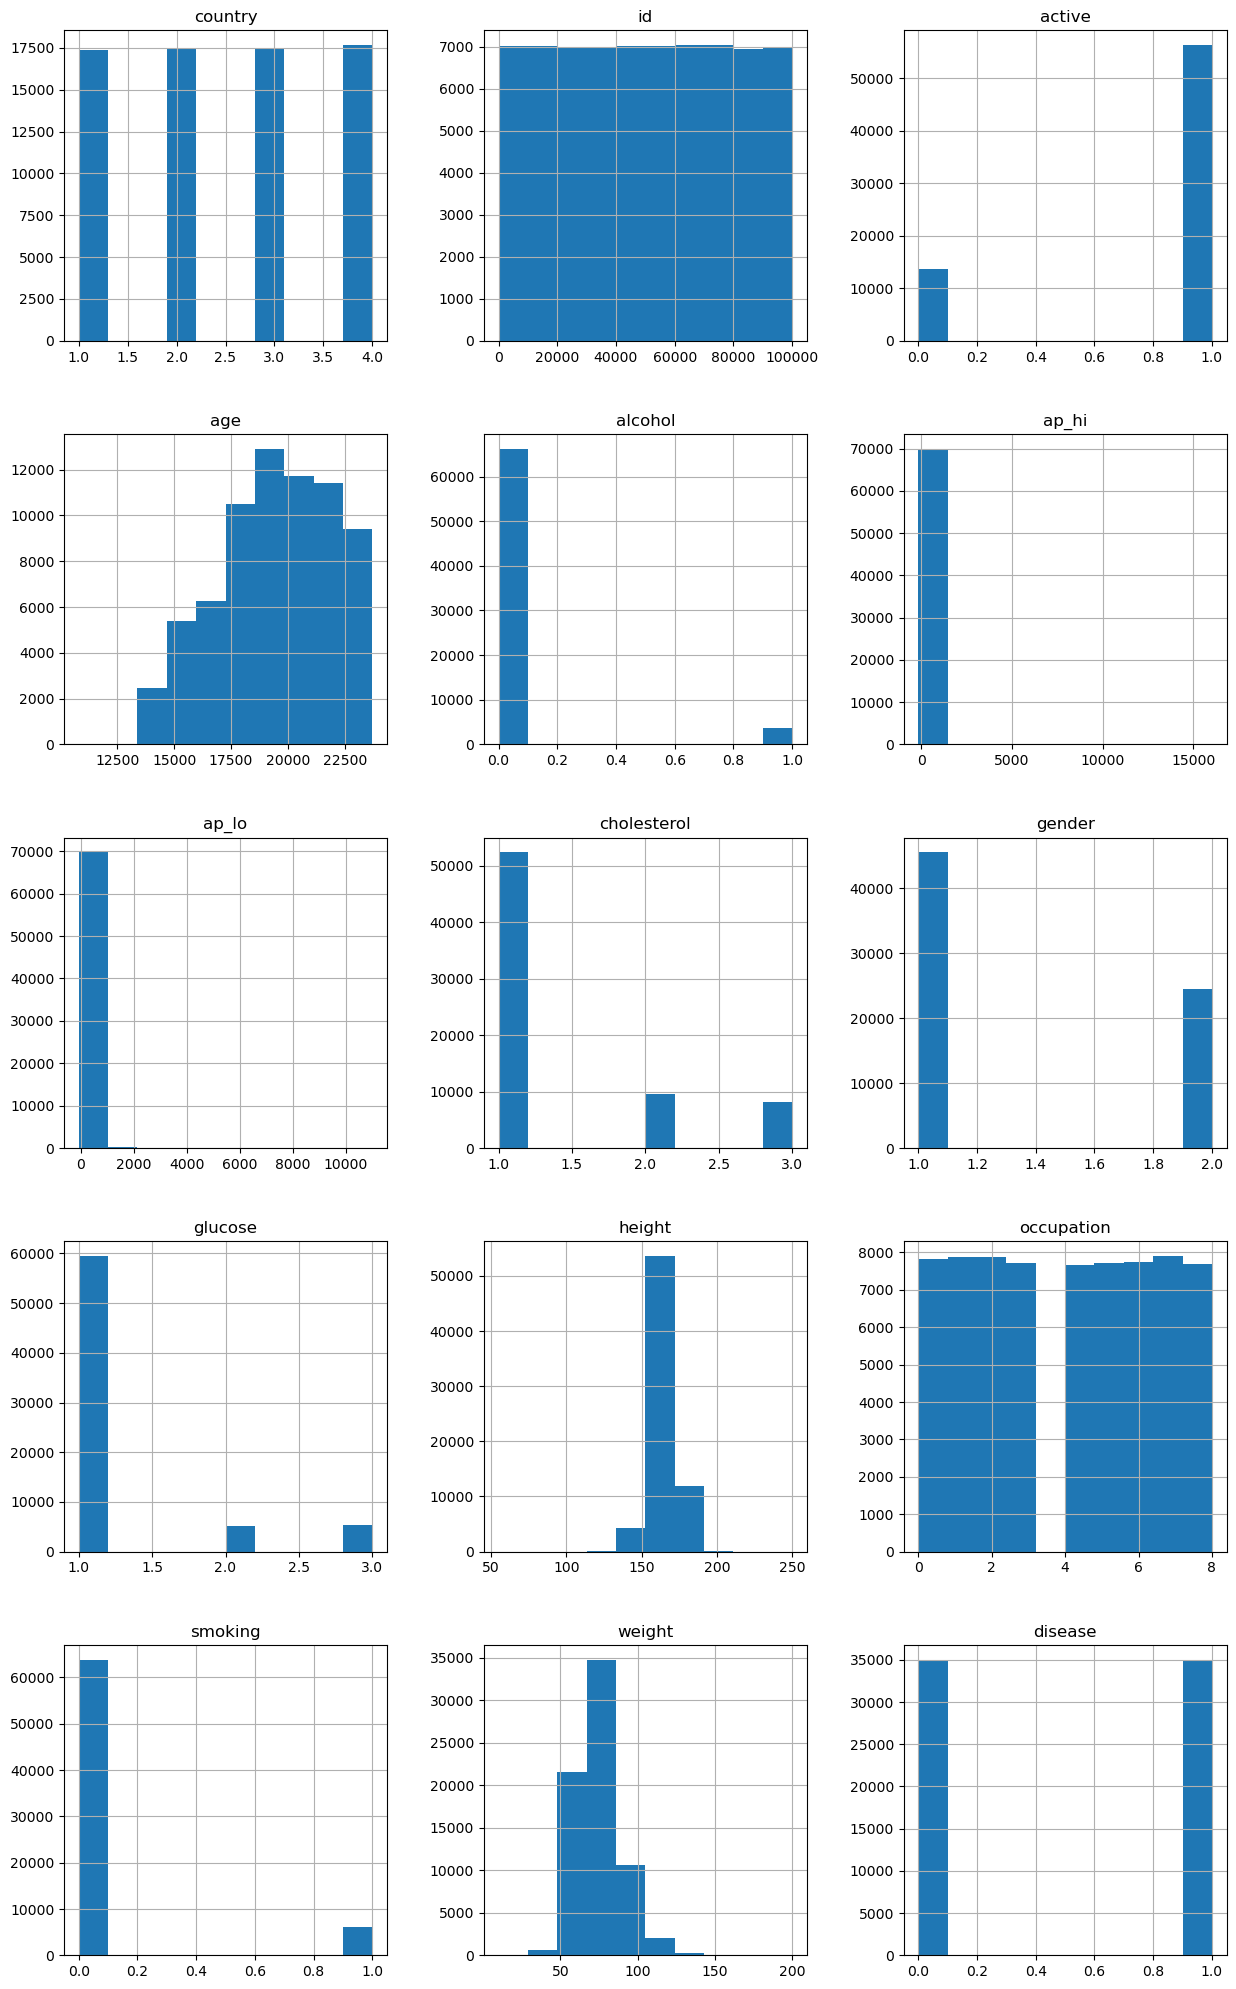

In [6]:
# Pictorial view of all the numeric data, more checking
dataset.hist(figsize = (15, 25), layout = (5, 3))

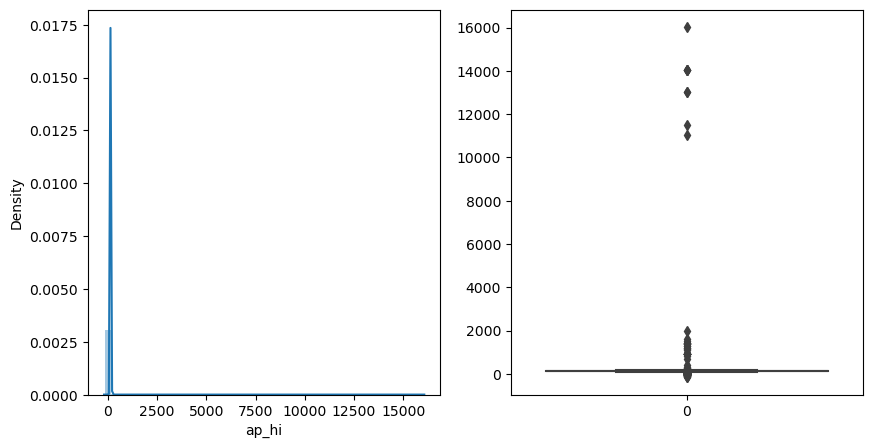

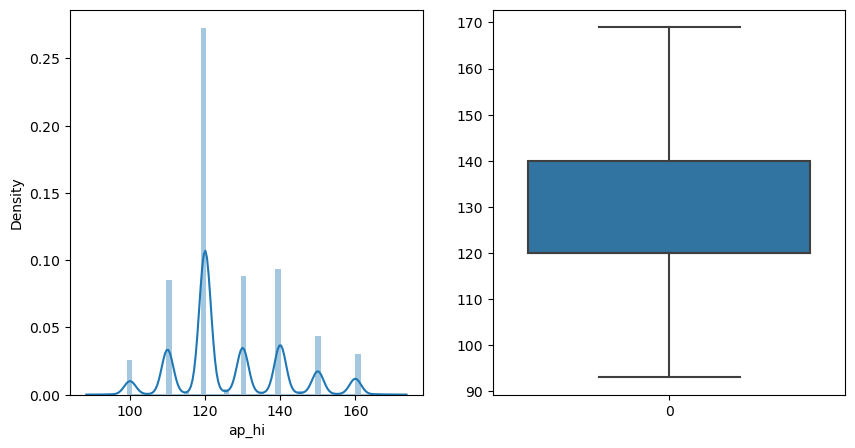

In [7]:
# Getting rid of outliers in the variable ap_hi
column = 'ap_hi'

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.distplot(dataset[column])
plt.subplot(1, 2, 2)
sns.boxplot(dataset[column])
plt.show()

q1 = dataset[column].quantile(0.25)
q3 = dataset[column].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
dataset = dataset[dataset[column] < upper_limit]
dataset = dataset[dataset[column] > lower_limit]

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.distplot(dataset[column])
plt.subplot(1, 2, 2)
sns.boxplot(dataset[column])
plt.show()

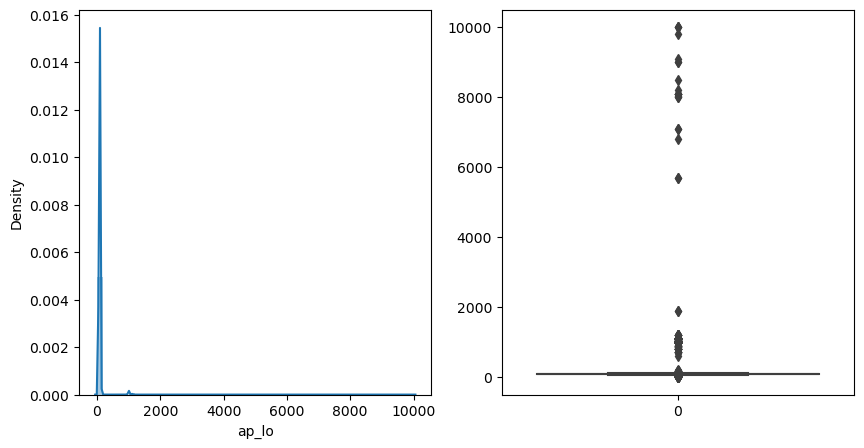

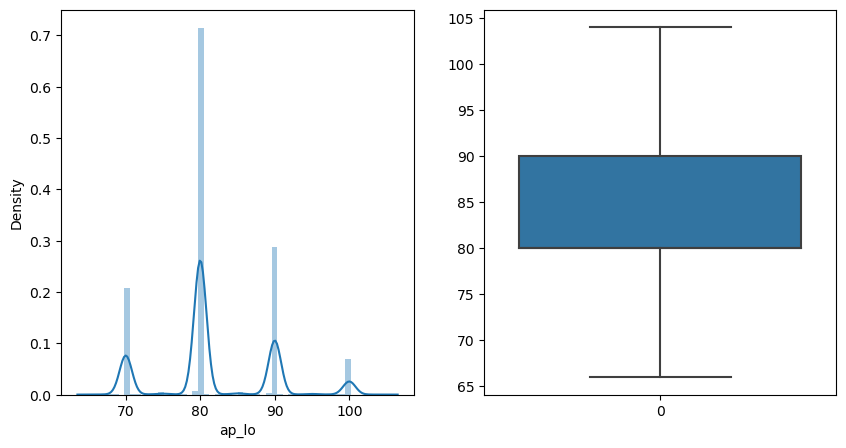

In [8]:
# Getting rid of outliers in the variable ap_lo
column = 'ap_lo'

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.distplot(dataset[column])
plt.subplot(1, 2, 2)
sns.boxplot(dataset[column])
plt.show()

q1 = dataset[column].quantile(0.25)
q3 = dataset[column].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
dataset = dataset[dataset[column] < upper_limit]
dataset = dataset[dataset[column] > lower_limit]

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.distplot(dataset[column])
plt.subplot(1, 2, 2)
sns.boxplot(dataset[column])
plt.show()

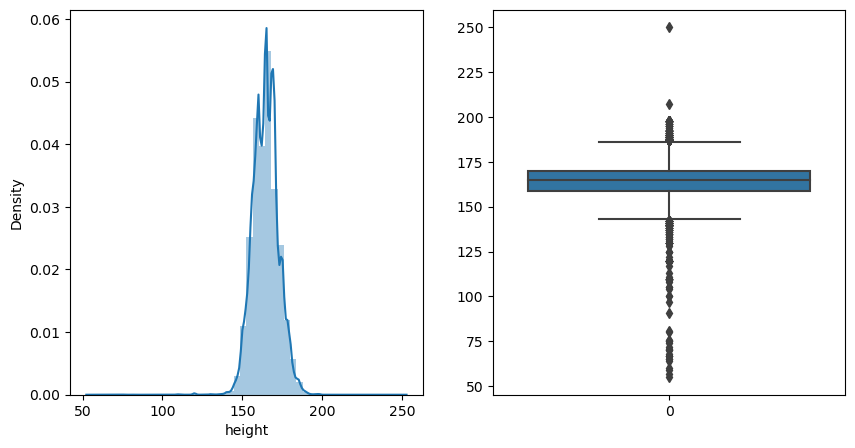

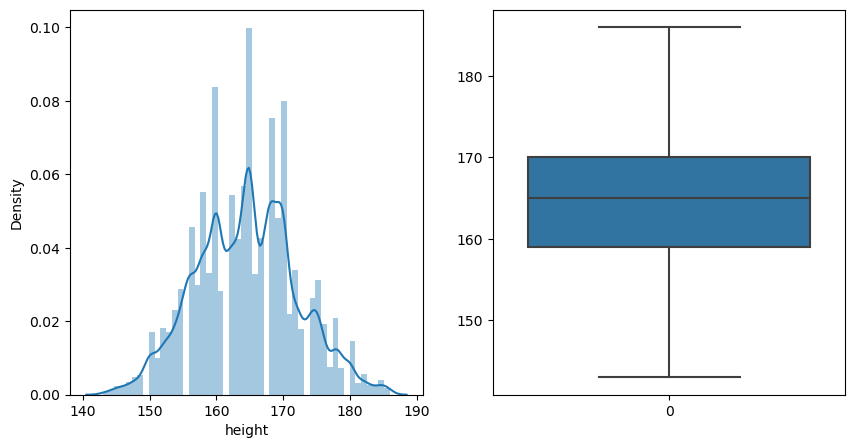

In [9]:
# Getting rid of outliers in the variable height
column = 'height'

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.distplot(dataset[column])
plt.subplot(1, 2, 2)
sns.boxplot(dataset[column])
plt.show()

q1 = dataset[column].quantile(0.25)
q3 = dataset[column].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
dataset = dataset[dataset[column] < upper_limit]
dataset = dataset[dataset[column] > lower_limit]

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.distplot(dataset[column])
plt.subplot(1, 2, 2)
sns.boxplot(dataset[column])
plt.show()

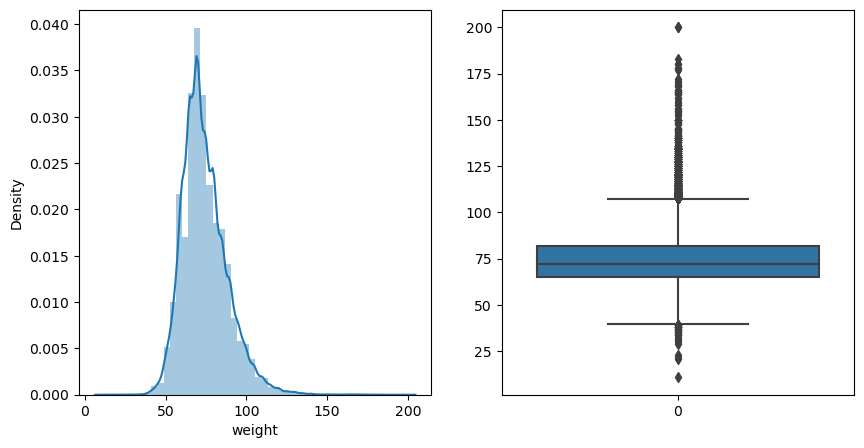

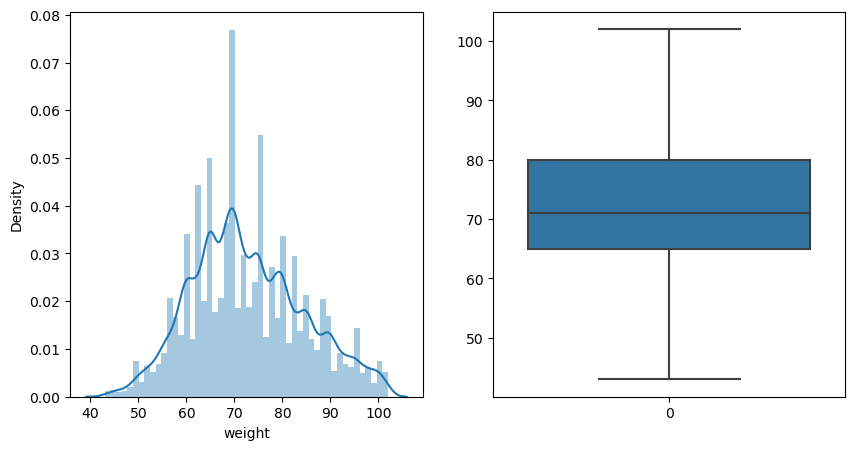

In [10]:
# Getting rid of outliers in the variable weight, needs 3 applications as weight has low variance
column = 'weight'

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.distplot(dataset[column])
plt.subplot(1, 2, 2)
sns.boxplot(dataset[column])
plt.show()

for i in range(3):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    dataset = dataset[dataset[column] < upper_limit]
    dataset = dataset[dataset[column] > lower_limit]

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.distplot(dataset[column])
plt.subplot(1, 2, 2)
sns.boxplot(dataset[column])
plt.show()

In [11]:
# Dropping irrelevant columns
dataset = dataset.drop(['date', 'id'], axis = 1)

# Dropping duplicate data, as ML works better with unique data 
dataset = dataset.drop_duplicates()

# ML is sensitive to the scale of the variables.  Scaling prevent one variable from dominating the difference calculation
scaler = StandardScaler()
columns = ['age', 'ap_lo', 'ap_hi', 'height', 'weight']
dataset[columns] = scaler.fit_transform(dataset[columns])

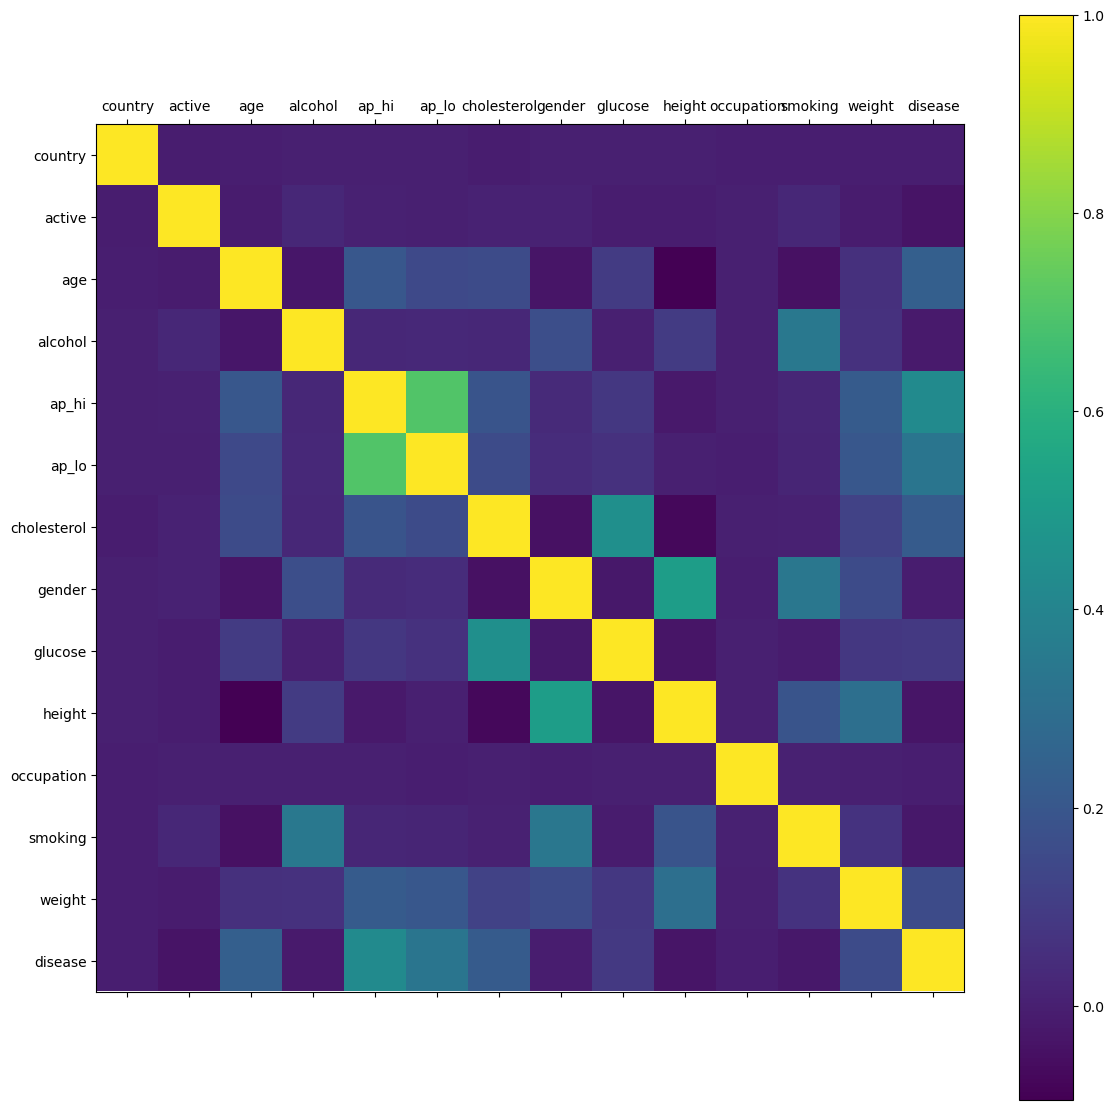

In [12]:
# Looking at the correlation between the variables to see if there is a strong correlation between them
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

In [13]:
# Splitting the data into 85% training data and 15% test data
y = dataset['disease']
X = dataset.drop(['disease'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

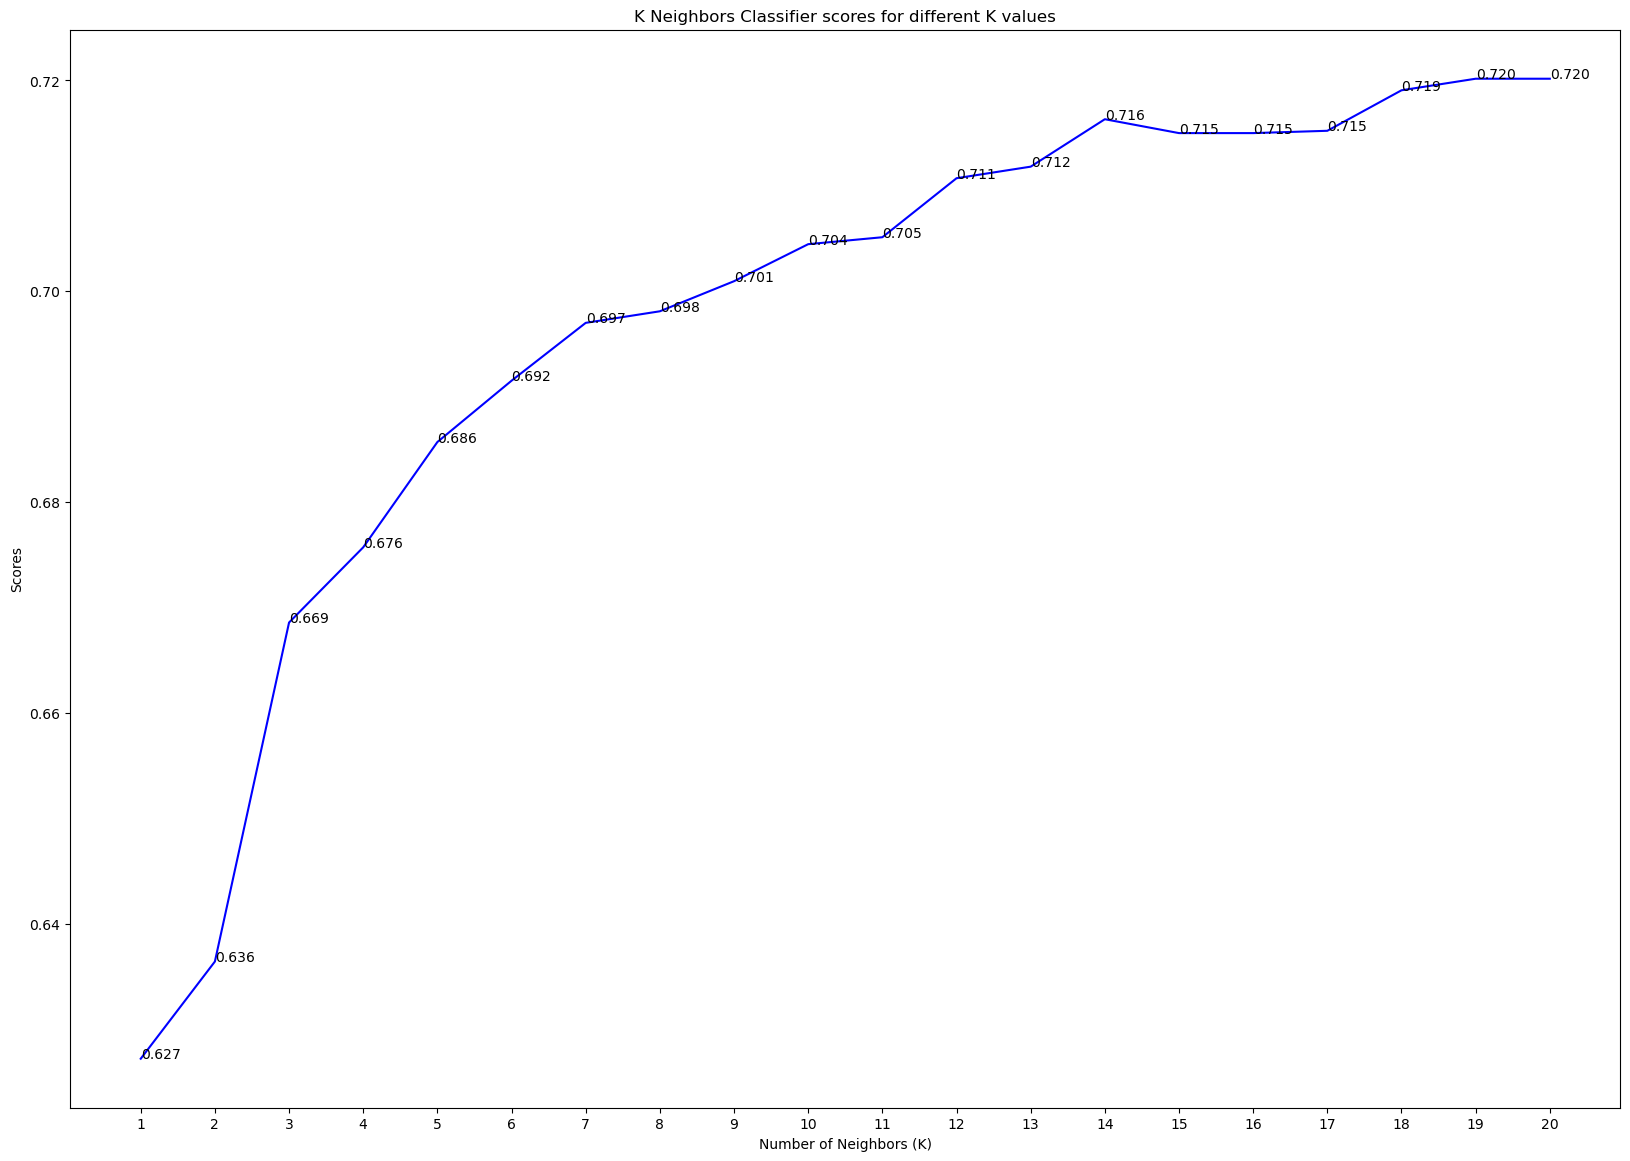

In [14]:
# K Neighbors Classifier with number of neighbors varying from 1 to 20
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1, 21):
    plt.text(i, knn_scores[i - 1], "%.3f" % knn_scores[i - 1])
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

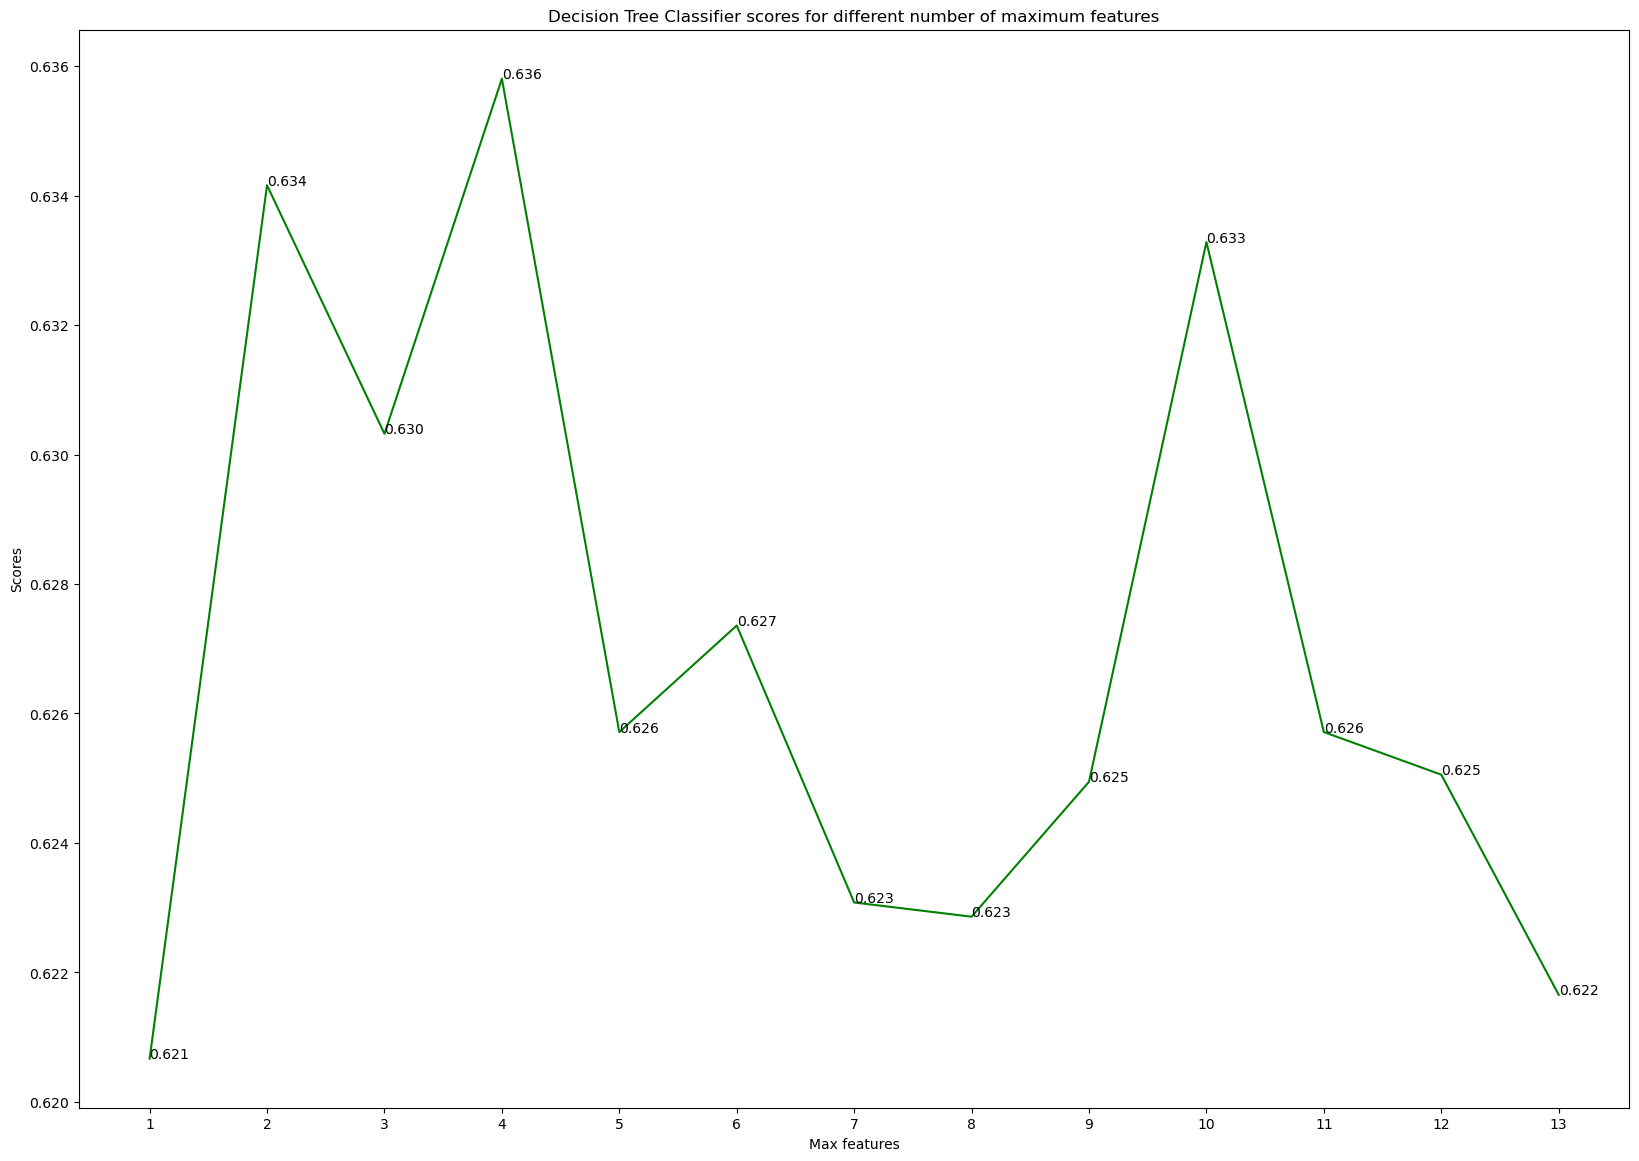

In [15]:
# Decision Tree Classifier with varying number of features (or columns)
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i - 1], "%.3f" % dt_scores[i - 1])
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

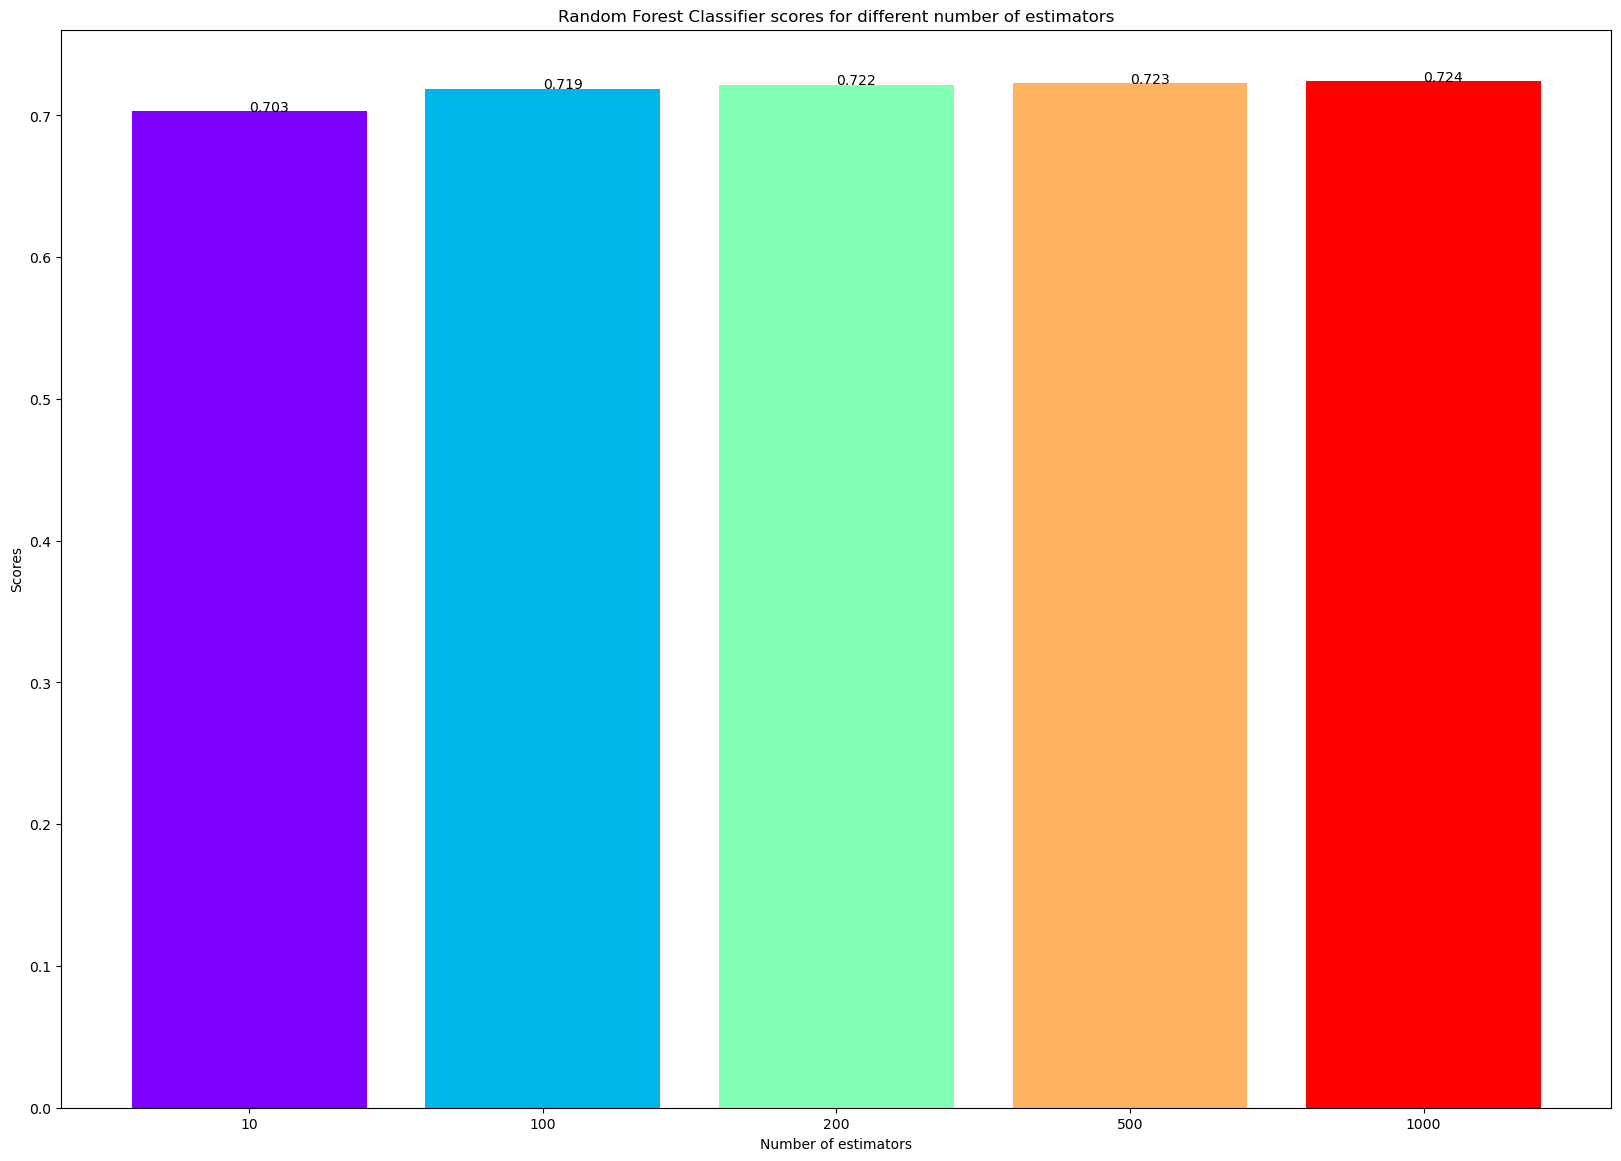

In [16]:
# Random Forest Classifier with varying number of trees (or features)
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], "%.3f" % rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

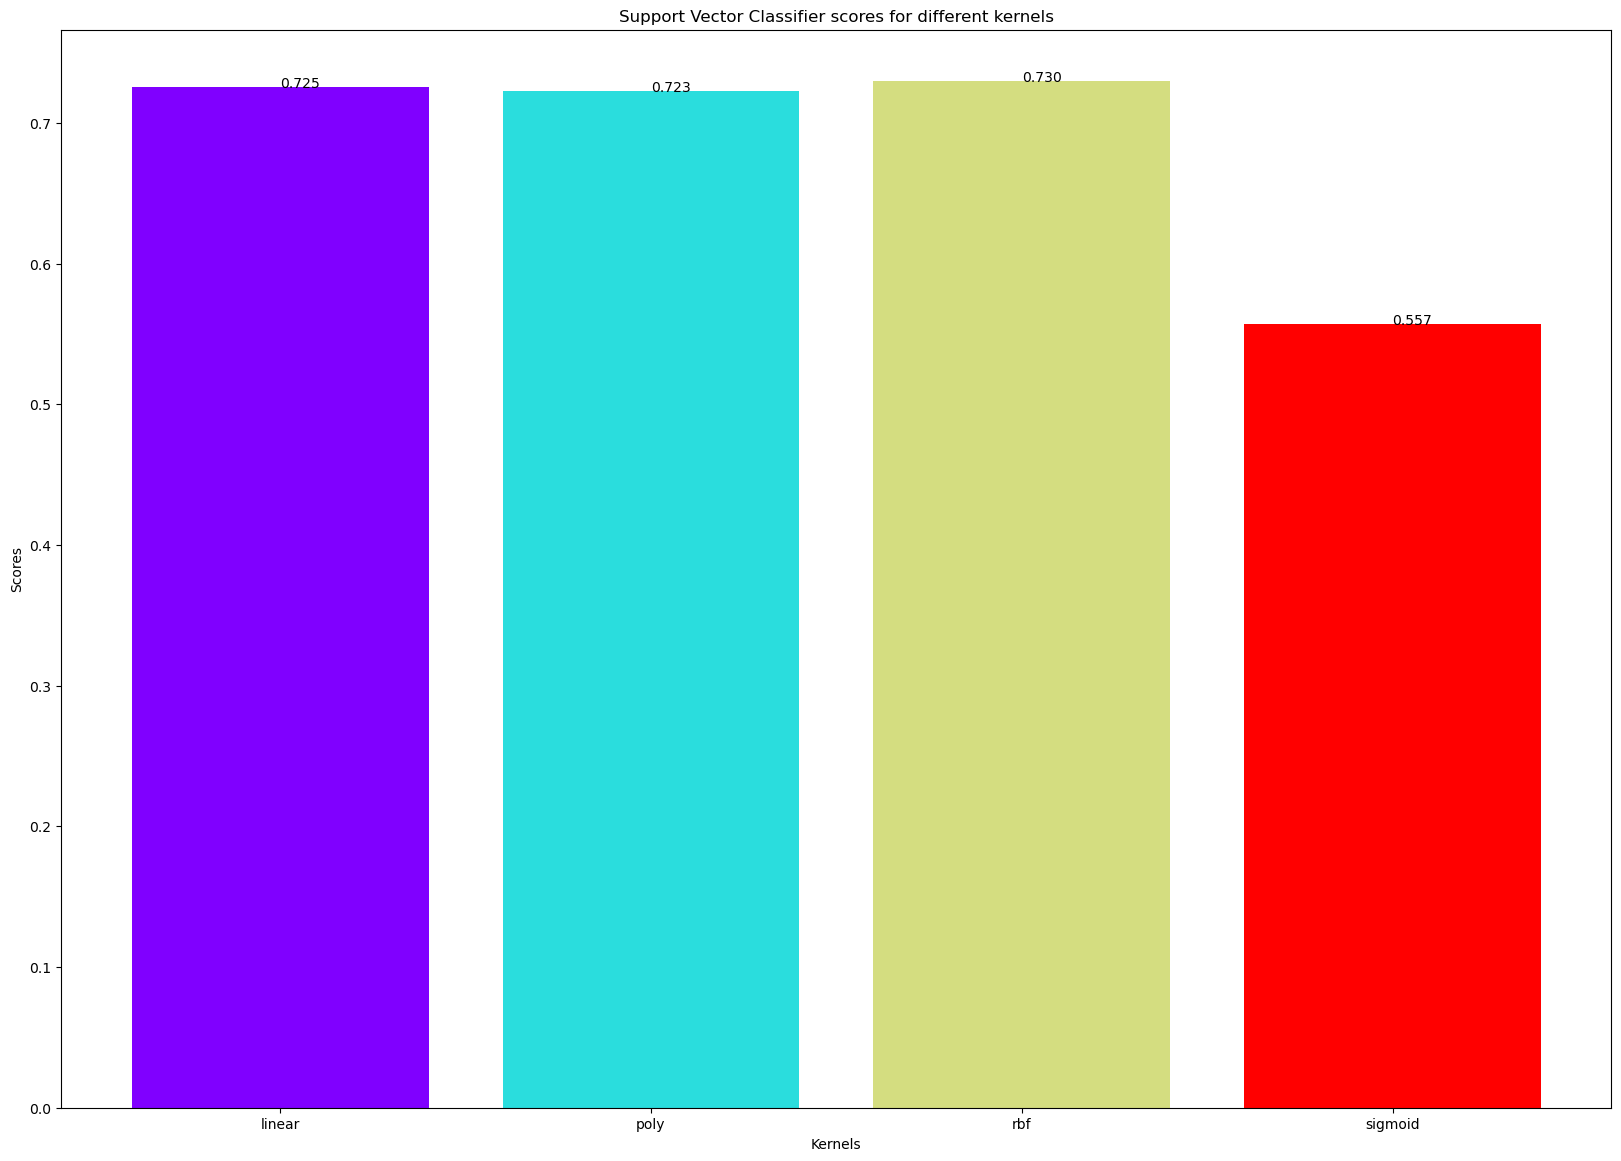

In [17]:
# Support Vector Classifier with different kernels
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], "%.3f" % svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')